In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# **1. Data Loading and Initial Exploration:**

In [ ]:
HR_data = pd.read_csv('/content/train.csv.zip')
HR_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
# Explore the structure of the dataset
print("Number of rows:", HR_data.shape[0])
print("Number of columns:", HR_data.shape[1])
print("Data types:\n", HR_data.dtypes)

Number of rows: 54808
Number of columns: 14
Data types:
 employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object


In [ ]:
#The first few rows of the dataset
print("First few rows:")
HR_data.head()

First few rows:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
#shape 14 Columns and 54,808 Rows
HR_data.shape

(54808, 14)

# **2. Data cleaning**


*   Handle missing values by Remove rows with missing values




In [ ]:
# Check for missing values
print("Missing values:\n")
HR_data.isna().sum()

Missing values:



employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
#Filled null values in the education column with the mode
HR_data['education'] = HR_data['education'].fillna(HR_data['education'].mode().iloc[0])

In [ ]:
#cheack after handle
HR_data.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
#Filled null values in the previous_year_rating column with the mean

#calculate the mean excluding null values
mean_value = np.mean(HR_data['previous_year_rating'].dropna())

#fill null values with the mean
HR_data['previous_year_rating'].fillna(mean_value, inplace=True)

HR_data.isnull().sum()


employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [ ]:
HR_data.isnull().any()

employee_id             False
department              False
region                  False
education               False
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating    False
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [ ]:
# Check for duplicate and handle it
print("Number of duplicate entries:")
HR_data.duplicated().sum()
# we dont have duplicate

Number of duplicate entries:


0

In [ ]:
# Convert Datatype

# Convert department, region, education, gender, and recruitment_channel to the 'category' data type
HR_data['department'] = HR_data['department'].astype('category')
HR_data['region'] = HR_data['region'].astype('category')
HR_data['education'] = HR_data['education'].astype('category')
HR_data['gender'] = HR_data['gender'].astype('category')
HR_data['recruitment_channel'] = HR_data['recruitment_channel'].astype('category')

# Print the updated data types of the DataFrame
print(HR_data.dtypes)

employee_id                int64
department              category
region                  category
education               category
gender                  category
recruitment_channel     category
no_of_trainings            int64
age                        int64
previous_year_rating     float64
length_of_service          int64
KPIs_met >80%              int64
awards_won?                int64
avg_training_score         int64
is_promoted                int64
dtype: object


# **3. Exploratory Data Analysis:**



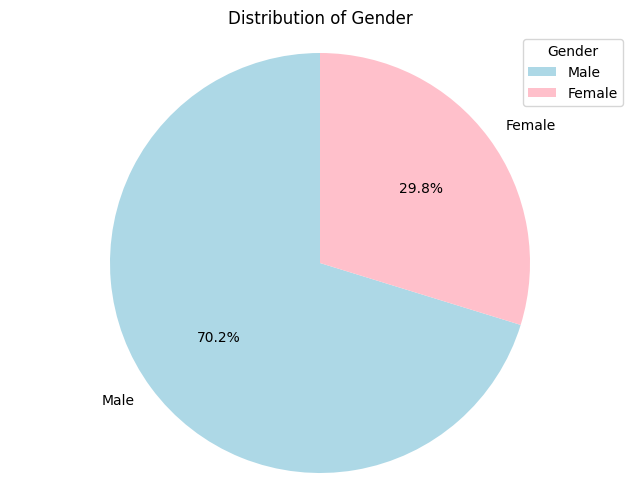

In [ ]:
colors = ['lightblue', 'pink']
gender_counts = HR_data['gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Gender')
plt.axis('equal')
plt.legend(title='Gender', loc='best')
plt.show()

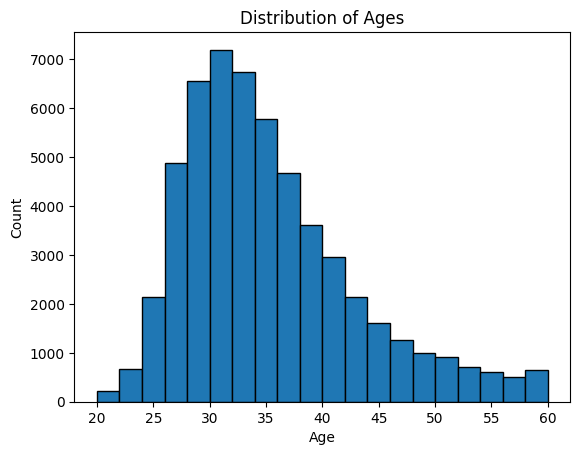

In [ ]:
#1
#Distribution of individual variables
#Example 2: Age

plt.hist(HR_data['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages')
plt.show()


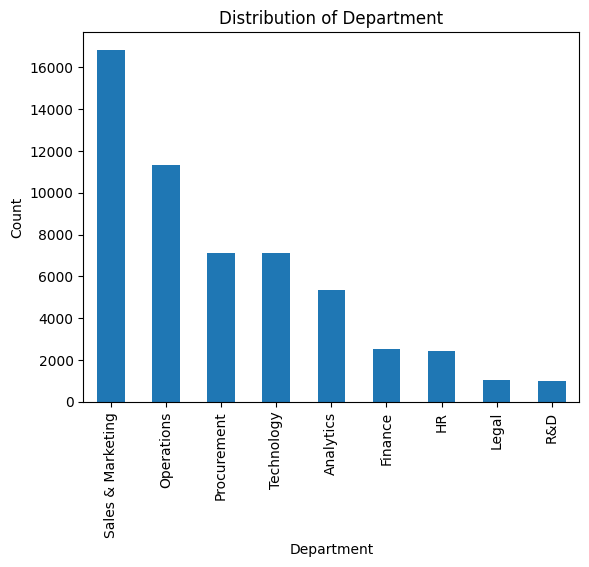

In [ ]:
#1
#Distribution of individual variables
#Example 3: Department

HR_data['department'].value_counts().plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Distribution of Department')
plt.show()


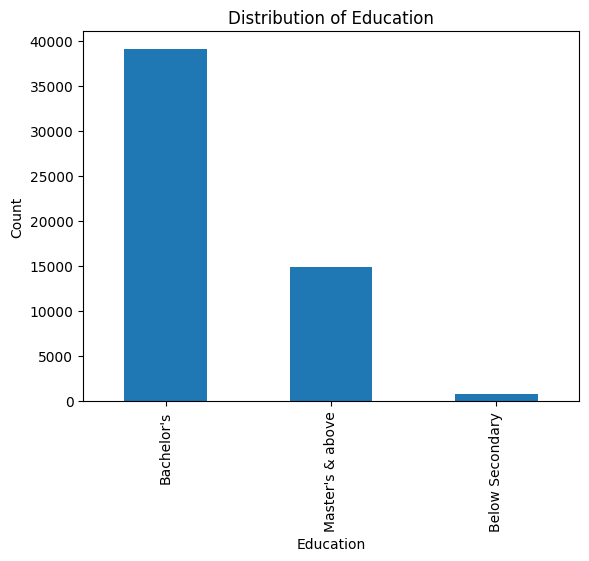

In [ ]:
#1
#Distribution of individual variables
#Example 4: Education

HR_data['education'].value_counts().plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education')
plt.show()


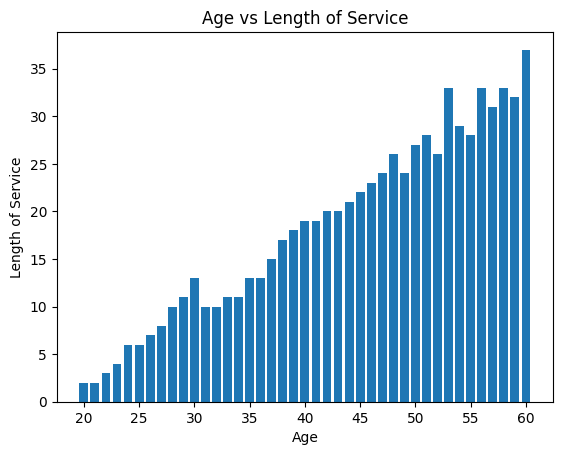

In [ ]:
#2
# Bivariate Analysis ( Relationship between variables )
# Example 2: Age vs Length of Service

plt.bar(HR_data['age'], HR_data['length_of_service'])
plt.xlabel('Age')
plt.ylabel('Length of Service')
plt.title('Age vs Length of Service')
plt.show()


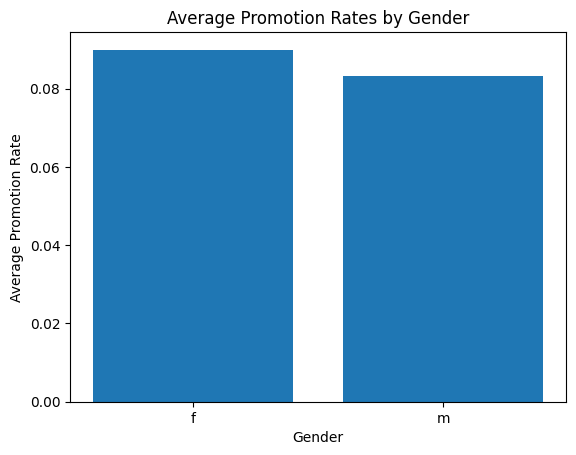

In [ ]:
#2
# Bivariate Analysis ( Relationship between variables )
# Example 3: Average Promotion Rates by Gender

gender_promotion_rates = HR_data.groupby('gender')['is_promoted'].mean()

plt.bar(gender_promotion_rates.index, gender_promotion_rates.values)
plt.xlabel('Gender')
plt.ylabel('Average Promotion Rate')
plt.title('Average Promotion Rates by Gender')

# Display the plot
plt.show()

In [ ]:
#3
# Summary Statistics
# Summary statistics for relevant variables
summary_stats = HR_data[['age', 'length_of_service']].describe()
print(summary_stats)

                age  length_of_service
count  54808.000000       54808.000000
mean      34.803915           5.865512
std        7.660169           4.265094
min       20.000000           1.000000
25%       29.000000           3.000000
50%       33.000000           5.000000
75%       39.000000           7.000000
max       60.000000          37.000000


In [ ]:
categorical_columns = ["department", "region", "education", "gender", "recruitment_channel"]

# Calculate the summary statistics
summary_statistics = HR_data[categorical_columns].value_counts()

# print the summary statistics
print("Summary Statistics for Categorical Columns:\n")
print(summary_statistics)

Summary Statistics for Categorical Columns:

department         region     education         gender  recruitment_channel
Sales & Marketing  region_2   Bachelor's        m       other                  827
                                                        sourcing               705
                   region_7   Bachelor's        m       other                  453
                   region_22  Bachelor's        m       other                  414
Operations         region_2   Bachelor's        f       other                  400
                                                                              ... 
HR                 region_1   Bachelor's        f       sourcing                 1
                              Master's & above  m       other                    1
                   region_10  Bachelor's        m       sourcing                 1
Technology         region_22  Below Secondary   f       sourcing                 1
Operations         region_26  Below Secondary   m

# **4. Feature Engineering:**


*   Create new features

*   Encode categorical variables if necessary (e.g., one-hot encoding)



In [ ]:
# Create new features name(age_group)
# Example 1: Age Group
HR_data['age_group'] = pd.cut(HR_data['age'], bins=[0, 25, 35, 45, 55, float('inf')],
                         labels=['<25', '25-35', '35-45', '45-55', '55+'])

In [ ]:
HR_data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_group
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,25-35
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,25-35
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,25-35
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,35-45
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,35-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0,45-55
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0,35-45
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0,25-35
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0,25-35


In [ ]:
service_length_mapping = {
    0.0: 'Entry-level',
    1.0: 'Mid-level',
    2.0: 'Mid-level',
    3.0: 'Mid-level',
    4.0: 'Mid-level',
    5.0: 'Senior-level',
    6.0: 'Senior-level',
    7.0: 'Senior-level',
    8.0: 'Executive-level',
    9.0: 'Executive-level',
    10.0: 'Executive-level',
    # Add more mappings as needed
}

HR_data['experience_leeeevel'] = HR_data['length_of_service'].map(service_length_mapping)

HR_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_group,experience_leeeevel
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,25-35,Executive-level
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,25-35,Mid-level
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,25-35,Senior-level
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,35-45,Executive-level
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,35-45,Mid-level


In [ ]:
#specify the categorical columns to be one-hot encoded
categorical_columns = ['department', 'region', 'education', 'gender', 'recruitment_channel']

#perform one-hot encoding
encoded_HR_data = pd.get_dummies(HR_data, columns=categorical_columns)

In [ ]:
HR_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_group,experience_leeeevel
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,25-35,Executive-level
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,25-35,Mid-level
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,25-35,Senior-level
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,35-45,Executive-level
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,35-45,Mid-level


In [ ]:
HR_data.to_csv('HR_data_with_features.csv', index=False)

# **5. Hypothesis Testing**

In [ ]:
#Example: Hypothesis testing ( average promotion rates for each gender between female and male )
#We use T-test beacuse given that we are comparing two independent groups (males and females) and examining the difference in their promotion rates.


#promotion data for each gender
male_promotion = HR_data[HR_data['gender'] == 'm']['is_promoted']
female_promotion = HR_data[HR_data['gender'] == 'f']['is_promoted']

t_statistic, p_value = stats.ttest_ind(male_promotion, female_promotion, equal_var=False)

print('Hypothesis Testing for Gender:')
print(f'T - Test')
#T-value : difference in promotion rates between male and female
print(f'T-value: {t_statistic}')

print(f'P-value: {p_value}')

# Calculate the average promotion rates for each gender
male_avg_promotion = male_promotion.mean()
female_avg_promotion = female_promotion.mean()

print('Average Promotion Rates:')
print(f'Male: {male_avg_promotion:.2%}')
print(f'Female: {female_avg_promotion:.2%}')


#Rejecting the null hypothesis beacuse p-value (0.0104)  is below the significance level (0.05)

Hypothesis Testing for Gender:
T - Test
T-value: -2.563783306069941
P-value: 0.01035868146324101
Average Promotion Rates:
Male: 8.32%
Female: 8.99%


# **6. Conclusion**

**Summary**

*   The dataset has a higher percentage of male employees (70.2%) compared to female employees (29.8%).

*   The most common age in the dataset is 30, comprising 6.7% of the total.


*   Sales & Marketing is the largest department with 16,840 employees, followed by Operations and Procurement.


*   Promotion Gender Gap: Statistically significant  gender difference in promotions; females have slightly higher rates.


*   Age and Length of Service: Positive relationship between age and length of service, indicating employees tend to stay longer with the company.

**Recommendations**


*   Promote gender equality by providing equal opportunities for professional growth and development for all employees.

*   Implement effective retention strategies to retain experienced employees, including career advancement opportunities and competitive benefits.
*   Recognize and reward high-performing employees, especially females with higher average performance ratings.



# **.                       The End**